In [31]:
import pickle

import matplotlib.pyplot as plt
import numpy as np

import os
os.chdir('..')

In [32]:
with open('data/demonstration_real_center_out.pkl', 'rb') as fp:
    episodes = pickle.load(fp)

FileNotFoundError: [Errno 2] No such file or directory: 'data/demonstration_real_center_out.pkl'

In [33]:
episodes['ee_vel'] = [
    np.array([step.translation for step in episode[1:]]) - np.array([step.translation for step in episode[:-1]]) 
    for episode in episodes['ee_pos']]

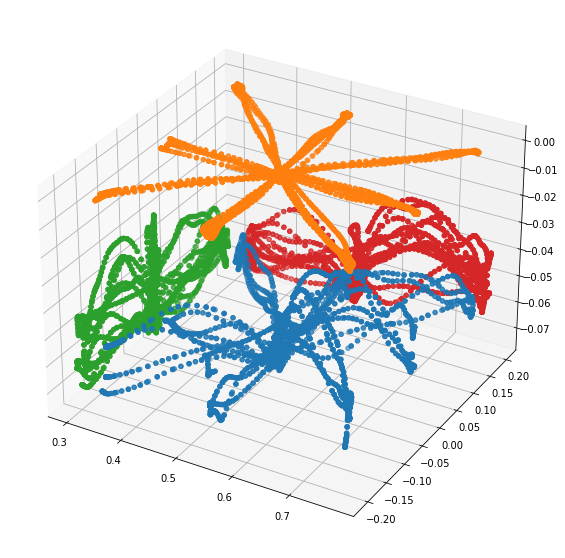

In [34]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(
    [step.translation[0] for episode in episodes['ee_pos'] for step in episode], 
    [step.translation[1] for episode in episodes['ee_pos'] for step in episode],
    [step.translation[2] for episode in episodes['ee_pos'] for step in episode])

ax.scatter(
    [step.translation[0] for episode in episodes['ee_pos'] for step in episode], 
    [step.translation[1] for episode in episodes['ee_pos'] for step in episode])

ax.scatter(
    .3,
    [step.translation[1] for episode in episodes['ee_pos'] for step in episode],
    [step.translation[2] for episode in episodes['ee_pos'] for step in episode])

ax.scatter(
    [step.translation[0] for episode in episodes['ee_pos'] for step in episode], 
    .2,
    [step.translation[2] for episode in episodes['ee_pos'] for step in episode])

plt.show()

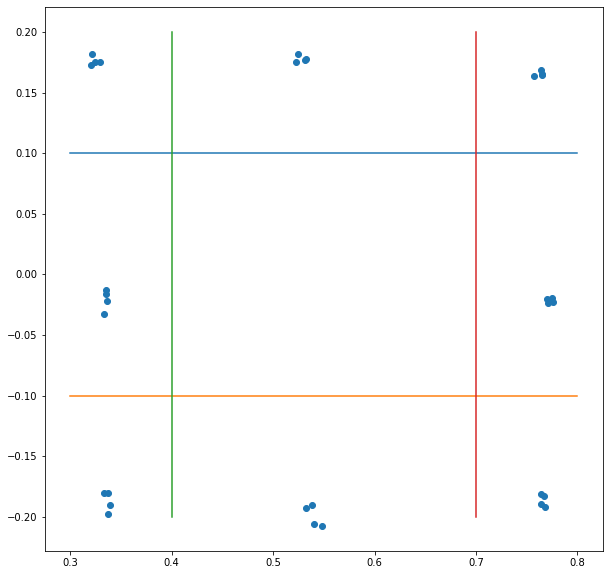

In [35]:
fig = plt.figure(figsize=(10, 10))

plt.scatter(
    [episode[-1].translation[0] for episode in episodes['ee_pos']],
    [episode[-1].translation[1] for episode in episodes['ee_pos']])

plt.plot([0.3, 0.8], [0.1, 0.1])
plt.plot([0.3, 0.8], [-0.1, -0.1])
plt.plot([0.4, 0.4], [-0.2, 0.2])
plt.plot([0.7, 0.7], [-0.2, 0.2])

plt.show()

In [36]:
goal_criteria = [
    lambda ee_pos: ee_pos[0] < 0.4 and ee_pos[1] > 0.1,
    lambda ee_pos: ee_pos[0] > 0.4 and ee_pos[0] < 0.7 and ee_pos[1] > 0.1,
    lambda ee_pos: ee_pos[0] > 0.7 and ee_pos[1] > 0.1,
    lambda ee_pos: ee_pos[0] < 0.4 and ee_pos[1] < 0.1 and ee_pos[1] > -0.1,
    lambda ee_pos: ee_pos[0] > 0.7 and ee_pos[1] < 0.1 and ee_pos[1] > -0.1,
    lambda ee_pos: ee_pos[0] < 0.4 and ee_pos[1] < -0.1,
    lambda ee_pos: ee_pos[0] > 0.4 and ee_pos[0] < 0.7 and ee_pos[1] < -0.1,
    lambda ee_pos: ee_pos[0] > 0.7 and ee_pos[1] < -0.1]

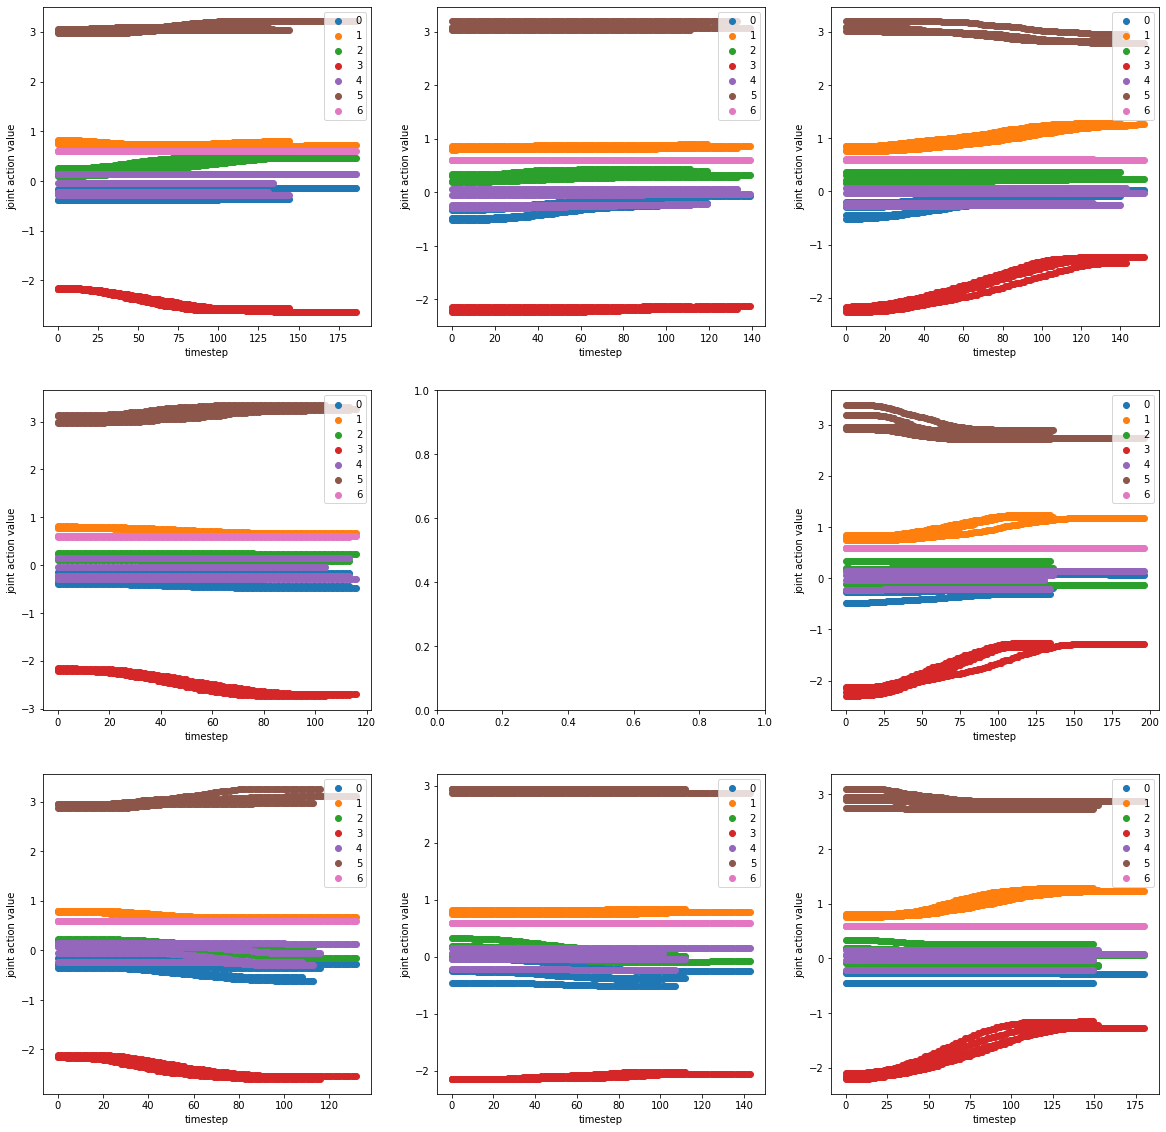

In [37]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

for i, goal_criterion in enumerate(goal_criteria):
    if i >= 4:
        i += 1 # offset for visualization
        
    episodes_by_goal = list(filter(
        lambda episode: goal_criterion(episode[0][-1].translation),
        zip(episodes['ee_pos'], episodes['j_pos'])))
        
    for joint_id in range(7):
        axs[i // 3, i % 3].scatter(
            [i for episode_ee_pos, episode_j_pos in episodes_by_goal for i, _ in enumerate(episode_j_pos)], 
            [step[joint_id] for episode_ee_pos, episode_j_pos in episodes_by_goal for step in episode_j_pos], 
            label=joint_id)
        
    axs[i // 3, i % 3].legend()
    axs[i // 3, i % 3].set_xlabel('timestep')
    axs[i // 3, i % 3].set_ylabel('joint action value')
    # axs[i // 3, i % 3].set_xlim(-1, 56)
    # axs[i // 3, i % 3].set_ylim(-.6, .6)

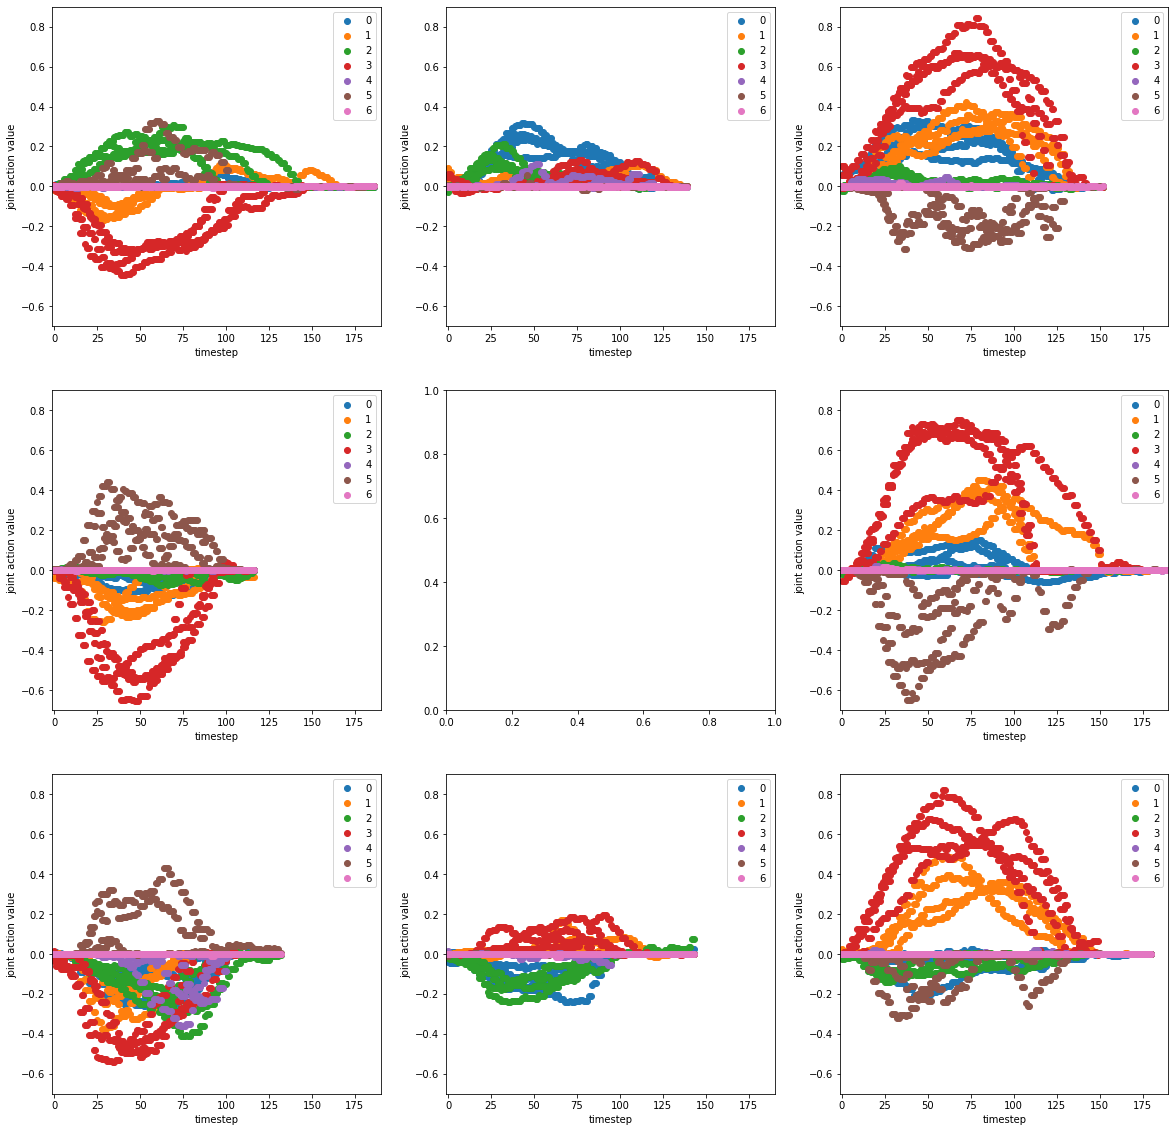

In [42]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

for i, goal_criterion in enumerate(goal_criteria):
    if i >= 4:
        i += 1 # offset for visualization
        
    episodes_by_goal = list(filter(
        lambda episode: goal_criterion(episode[0][-1].translation),
        zip(episodes['ee_pos'], episodes['j_vel'])))
        
    for joint_id in range(7):
        axs[i // 3, i % 3].scatter(
            [i for episode_ee_pos, episode_j_pos in episodes_by_goal for i, _ in enumerate(episode_j_pos)], 
            [step[joint_id] for episode_ee_pos, episode_j_pos in episodes_by_goal for step in episode_j_pos], 
            label=joint_id)
        
    axs[i // 3, i % 3].legend()
    axs[i // 3, i % 3].set_xlabel('timestep')
    axs[i // 3, i % 3].set_ylabel('joint action value')
    axs[i // 3, i % 3].set_xlim(-1, 190)
    axs[i // 3, i % 3].set_ylim(-.7, .9)

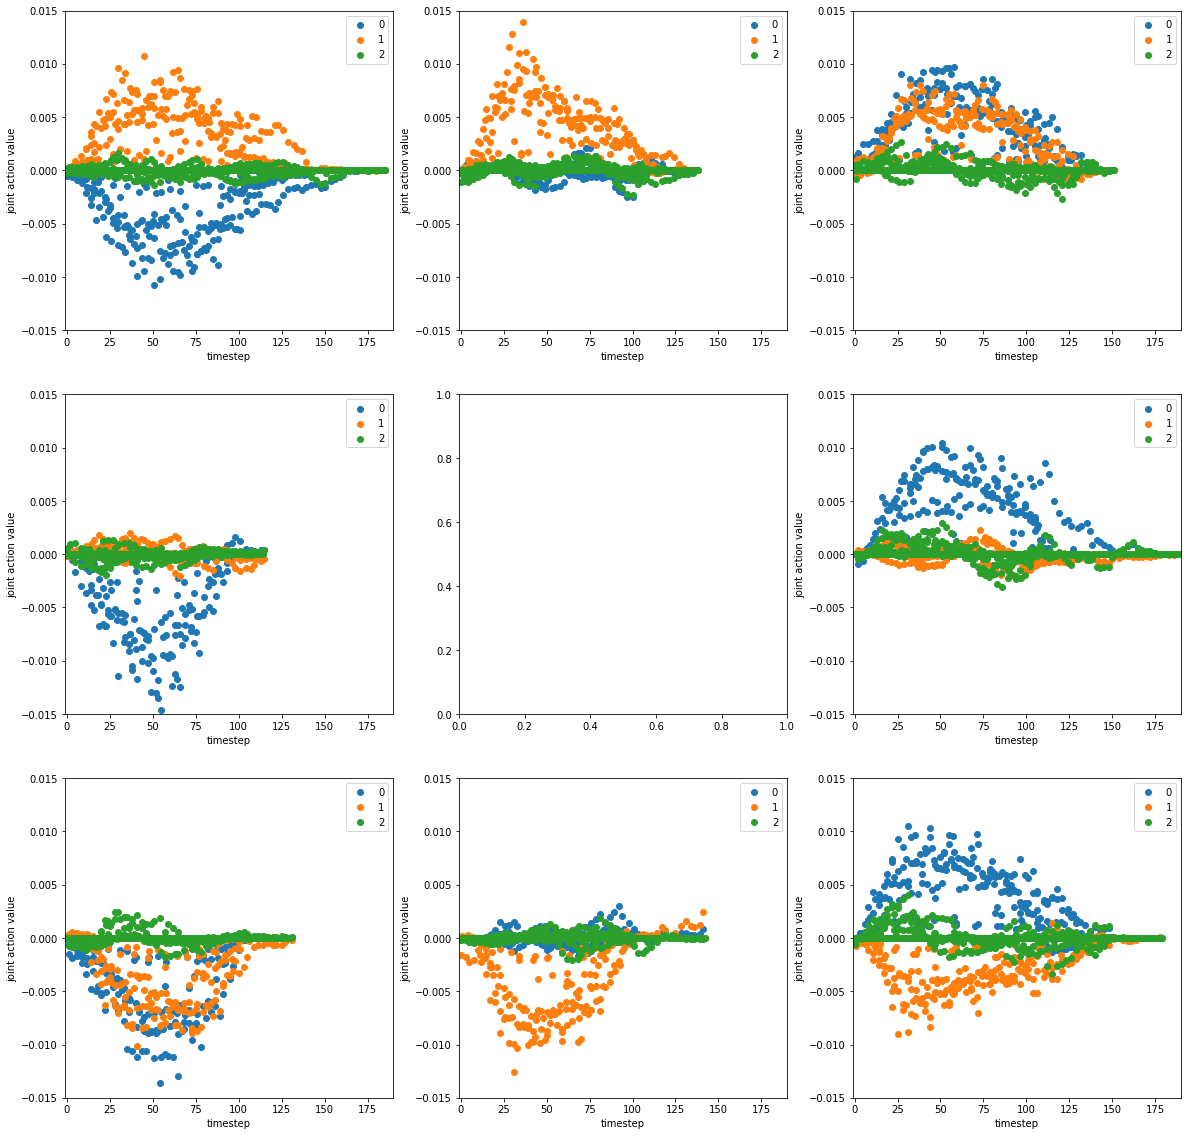

In [45]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

for i, goal_criterion in enumerate(goal_criteria):
    if i >= 4:
        i += 1 # offset for visualization
        
    episodes_by_goal = list(filter(
        lambda episode: goal_criterion(episode[0][-1].translation),
        zip(episodes['ee_pos'], episodes['ee_vel'])))
        
    for joint_id in range(3):
        axs[i // 3, i % 3].scatter(
            [i for episode_ee_pos, episode_j_pos in episodes_by_goal for i, _ in enumerate(episode_j_pos)], 
            [step[joint_id] for episode_ee_pos, episode_j_pos in episodes_by_goal for step in episode_j_pos], 
            label=joint_id)
        
    axs[i // 3, i % 3].legend()
    axs[i // 3, i % 3].set_xlabel('timestep')
    axs[i // 3, i % 3].set_ylabel('joint action value')
    axs[i // 3, i % 3].set_xlim(-1, 190)
    axs[i // 3, i % 3].set_ylim(-.015, .015)

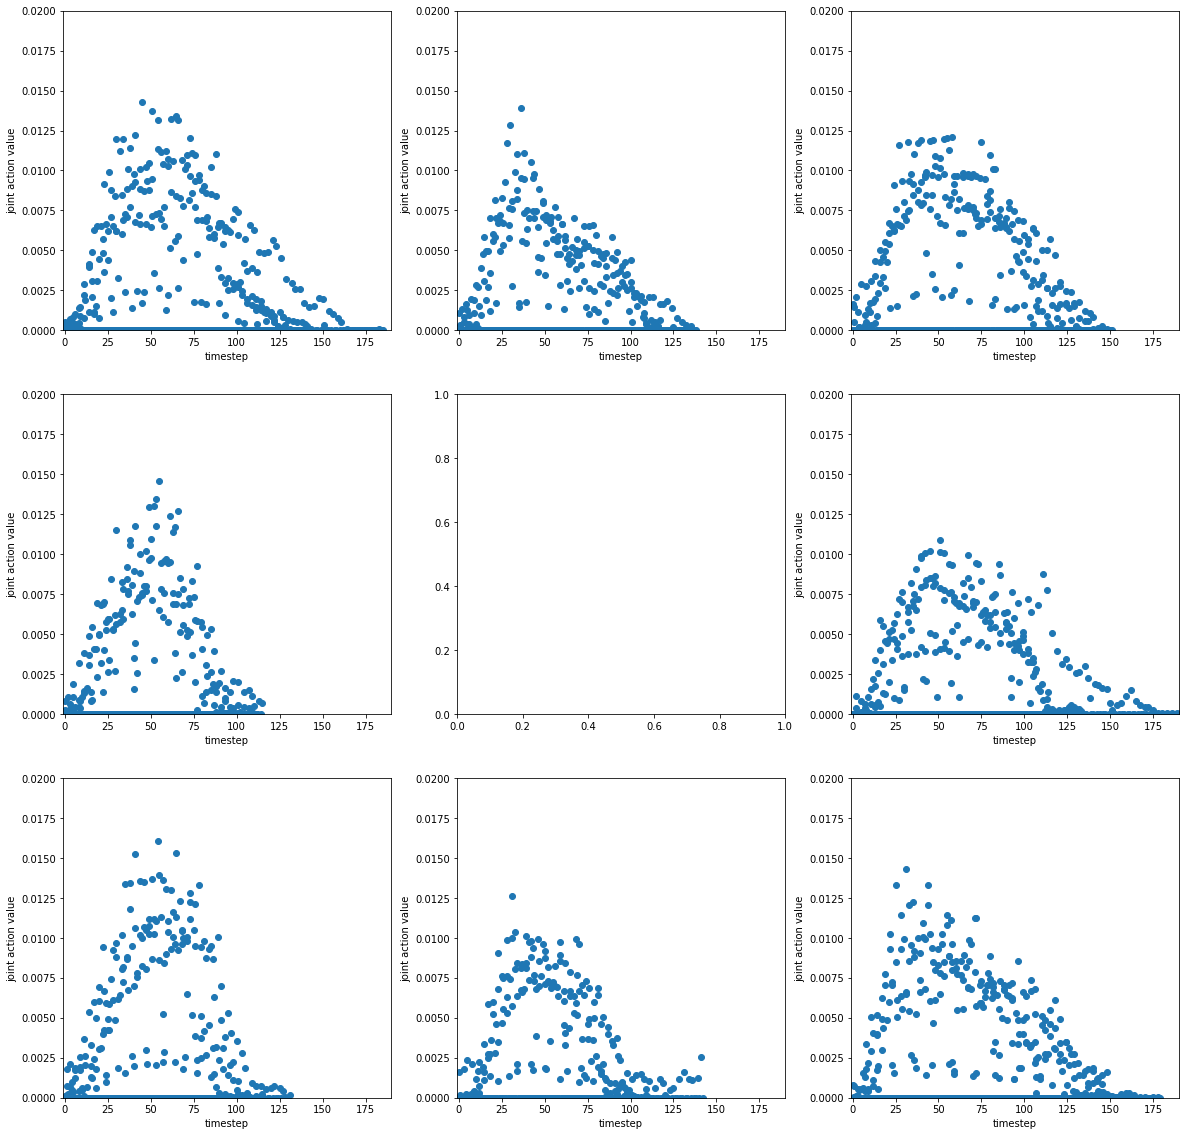

In [49]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

for i, goal_criterion in enumerate(goal_criteria):
    if i >= 4:
        i += 1 # offset for visualization
        
    episodes_by_goal = list(filter(
        lambda episode: goal_criterion(episode[0][-1].translation),
        zip(episodes['ee_pos'], episodes['ee_vel'])))
        
    axs[i // 3, i % 3].scatter(
        [i for episode_ee_pos, episode_j_pos in episodes_by_goal for i, _ in enumerate(episode_j_pos)], 
        [np.linalg.norm(step) for episode_ee_pos, episode_j_pos in episodes_by_goal for step in episode_j_pos])
        
    axs[i // 3, i % 3].set_xlabel('timestep')
    axs[i // 3, i % 3].set_ylabel('joint action value')
    axs[i // 3, i % 3].set_xlim(-1, 190)
    axs[i // 3, i % 3].set_ylim(0, .02)

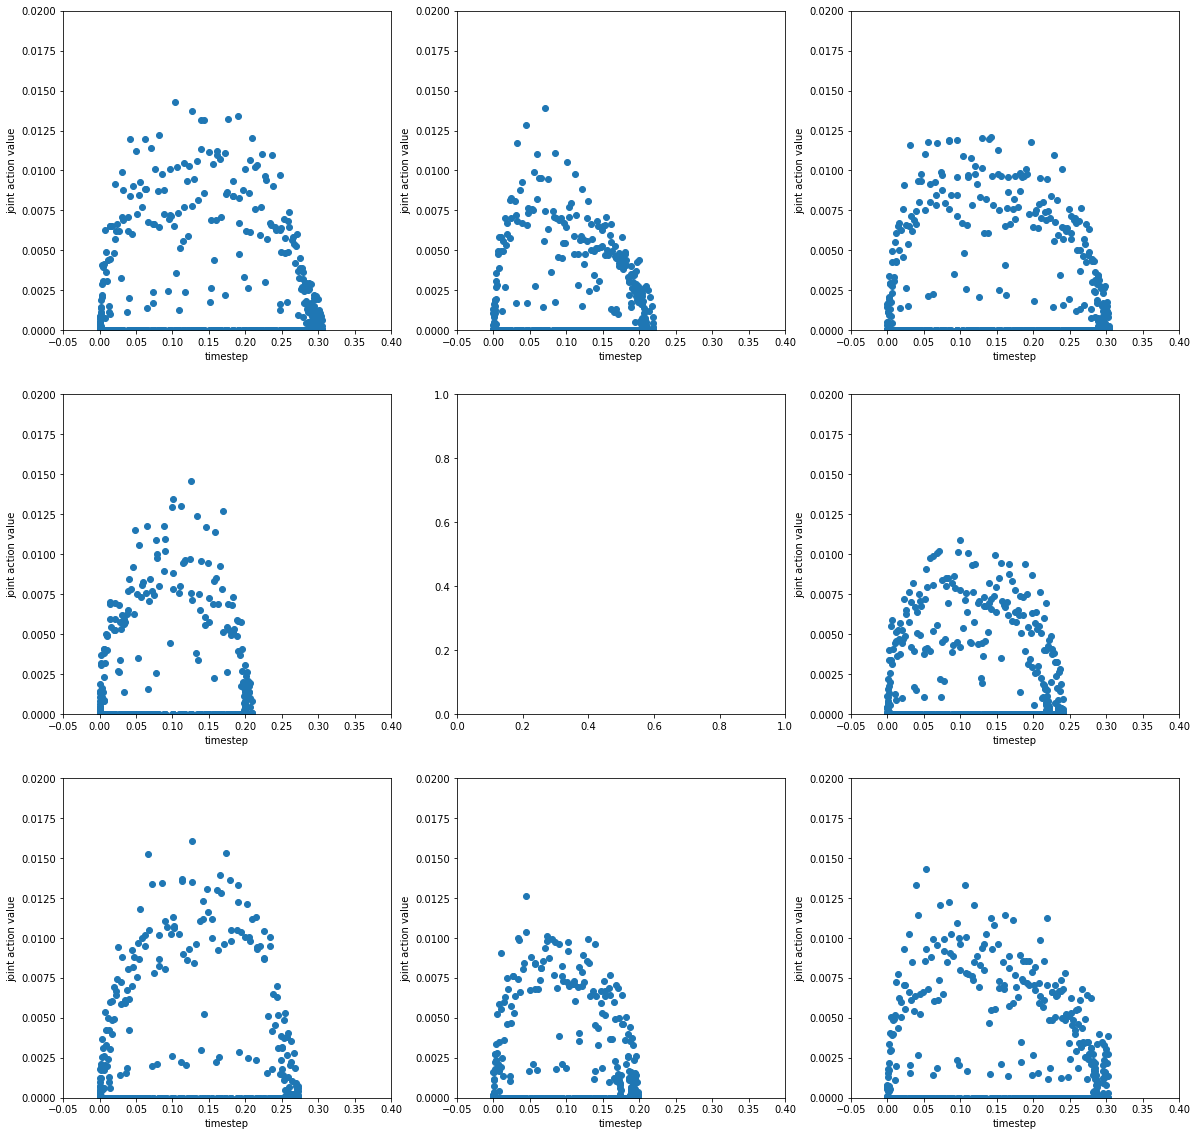

In [61]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

for i, goal_criterion in enumerate(goal_criteria):
    if i >= 4:
        i += 1 # offset for visualization
        
    episodes_by_goal = list(filter(
        lambda episode: goal_criterion(episode[0][-1].translation),
        zip(episodes['ee_pos'], episodes['ee_vel'])))
        
    axs[i // 3, i % 3].scatter(
        [np.linalg.norm(step_ee_pos.translation - episode_ee_pos[0].translation) 
         for episode_ee_pos, _ in episodes_by_goal for step_ee_pos in episode_ee_pos[:-1]], 
        [np.linalg.norm(step_ee_vel) for _, episode_ee_vel in episodes_by_goal for step_ee_vel in episode_ee_vel])
        
    axs[i // 3, i % 3].set_xlabel('timestep')
    axs[i // 3, i % 3].set_ylabel('joint action value')
    axs[i // 3, i % 3].set_xlim(-0.05, 0.4)
    axs[i // 3, i % 3].set_ylim(0, .02)